* mnist 코드 정리

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D
from tensorflow.keras.utils import plot_model

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [ ]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.dropout = Dropout(0.2)
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    x = self.dropout(x)
    return self.d2(x)

model = MyModel()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=12, batch_size=512, validation_split=0.25)

Epoch 1/12
88/88 [==============================] - 6s 14ms/step - loss: 0.3985 - accuracy: 0.8805 - val_loss: 0.1666 - val_accuracy: 0.9503
Epoch 2/12
88/88 [==============================] - 1s 9ms/step - loss: 0.1405 - accuracy: 0.9584 - val_loss: 0.0983 - val_accuracy: 0.9707
Epoch 3/12
88/88 [==============================] - 1s 9ms/step - loss: 0.0834 - accuracy: 0.9752 - val_loss: 0.0830 - val_accuracy: 0.9751
Epoch 4/12
88/88 [==============================] - 1s 9ms/step - loss: 0.0589 - accuracy: 0.9830 - val_loss: 0.0693 - val_accuracy: 0.9793
Epoch 5/12
88/88 [==============================] - 1s 9ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 0.0656 - val_accuracy: 0.9805
Epoch 6/12
88/88 [==============================] - 1s 9ms/step - loss: 0.0331 - accuracy: 0.9902 - val_loss: 0.0588 - val_accuracy: 0.9819
Epoch 7/12
88/88 [==============================] - 1s 9ms/step - loss: 0.0258 - accuracy: 0.9927 - val_loss: 0.0647 - val_accuracy: 0.9807
Epoch 8/12
88/88 [=

In [ ]:
sc = model.evaluate(x_test, y_test)
print("accuracy : ", sc[1], "  loss : ", sc[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.9851
accuracy :  0.9850999712944031   loss :  0.048495665192604065


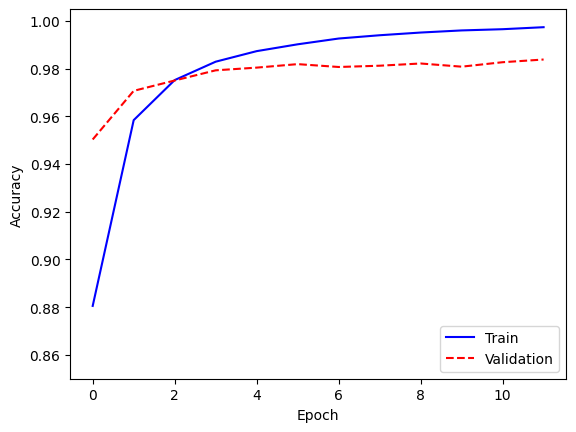

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.ylim([0.85,1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()